# Model Evaluation and Validation 

This notebook provides an interactive guide to understanding and implementing key concepts in model evaluation and validation. It covers:

1. Train-Test Split
2. Cross-Validation Techniques
3. Bias-Variance Tradeoff
4. Performance Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC
5. Feature Importance Analysis
6. Class Imbalance Handling
7. Interactive Threshold Analysis
8. Hyperparameter Tuning (Interactive)


In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider
from imblearn.over_sampling import SMOTE

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Display the first few rows
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. Train-Test Split

### What is Train-Test Split?
Train-Test Split is a technique to evaluate the performance of a machine learning model by dividing the dataset into two parts:
- **Training set**: Used to train the model.
- **Testing set**: Used to evaluate the model's performance on unseen data.

### Implementation
We will use the `train_test_split` method from `scikit-learn` to split our data into training and testing sets.


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")


Training Set: (398, 30)
Testing Set: (171, 30)


## 2. Cross-Validation Techniques

### What is Cross-Validation?
Cross-validation is a resampling technique used to evaluate machine learning models on limited data. It splits the data into multiple folds and trains the model on all folds except one (used for validation).

### Common Cross-Validation Methods:
- **K-Fold Cross-Validation**
- **Stratified K-Fold Cross-Validation**

### Implementation
We will demonstrate K-Fold Cross-Validation using `scikit-learn`.


In [8]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# Cross-Validation Scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.2f}")


Cross-Validation Scores: [0.95614035 0.96491228 0.93859649 0.96491228 0.96460177]
Mean Accuracy: 0.96


# K-Fold Cross-Validation with RandomForest Classifier

In this script, we demonstrate how to perform **K-Fold Cross-Validation** using the **RandomForestClassifier** model. Cross-validation is a technique used to assess the performance of a machine learning model by training and testing it on different subsets of the data.

---

## Key Concepts:
1. **K-Fold Cross-Validation**:
   - The dataset is split into `K` subsets (folds). The model is trained on `K-1` folds and tested on the remaining fold. This process is repeated for each fold, and the performance scores are averaged to give a more reliable estimate of model performance.

2. **RandomForestClassifier**:
   - A popular ensemble learning method that builds multiple decision trees and merges them together to improve accuracy and control overfitting.

---

## Steps in the Script:
1. **Initialize K-Fold Cross-Validation**:
   - `n_splits=5` means the data is split into 5 equal folds.
   - `shuffle=True` ensures that the data is shuffled before splitting, preventing any potential bias from sequential ordering of the data.

2. **Model Setup**:
   - A **RandomForestClassifier** is initialized with `random_state=42` to ensure reproducibility.

3. **Perform Cross-Validation**:
   - The `cross_val_score` function from **scikit-learn** is used to perform K-Fold Cross-Validation. It returns the accuracy scores for each fold.

4. **Output the Results**:
   - The cross-validation scores are printed, followed by the mean accuracy, which provides a summary of the model's performance across all folds.

---

## Results Interpretation:
- The script outputs an array of **accuracy scores**, one for each fold, indicating how well the model performed on different subsets of the data.
- The **mean accuracy** represents the average performance of the model across all folds, providing an overall estimate of the model's effectiveness.



## 3. Bias-Variance Tradeoff

### What is the Bias-Variance Tradeoff?
The bias-variance tradeoff is a fundamental concept in machine learning. It refers to the tradeoff between two sources of error in a model:
- **Bias**: Error due to overly simplistic assumptions in the model.
- **Variance**: Error due to the model's sensitivity to small fluctuations in the training data.

### Visualizing the Tradeoff
We will train models with varying complexities and visualize their training and testing errors.


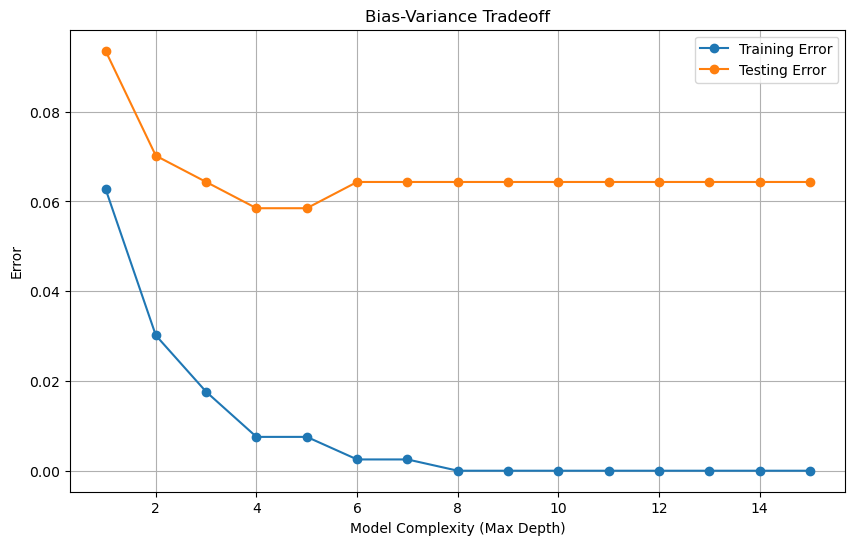

In [10]:
# Bias-Variance Tradeoff Visualization (Static)
# Import the required library

def bias_variance_tradeoff_static(max_depth):
    train_errors = []
    test_errors = []
    depths = range(1, max_depth + 1)

    for depth in depths:
        model = RandomForestClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        train_errors.append(1 - model.score(X_train, y_train))
        test_errors.append(1 - model.score(X_test, y_test))

    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_errors, label="Training Error", marker='o')
    plt.plot(depths, test_errors, label="Testing Error", marker='o')
    plt.title("Bias-Variance Tradeoff")
    plt.xlabel("Model Complexity (Max Depth)")
    plt.ylabel("Error")
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with a specific max depth for visualization
bias_variance_tradeoff_static(max_depth=15)


# Bias-Variance Tradeoff Visualization (Static)

In this script, we visualize the **Bias-Variance Tradeoff** using a **RandomForestClassifier** with varying model complexity. The goal is to show how increasing model complexity (i.e., increasing the `max_depth` of the tree) affects both the training and testing error, helping us understand the bias-variance tradeoff.

---

## Key Concepts:
1. **Bias-Variance Tradeoff**:
   - **Bias**: The error introduced by approximating a real-world problem with a simplified model. High bias occurs when the model is too simple (underfitting).
   - **Variance**: The error introduced by the model's sensitivity to small fluctuations in the training data. High variance occurs when the model is too complex (overfitting).
   - The goal is to find a balance between bias and variance, which minimizes the overall error.

2. **Random Forest Classifier**:
   - An ensemble learning model that builds multiple decision trees and aggregates their results. We vary the complexity of each individual tree by adjusting the `max_depth` parameter.

---

## Steps in the Script:
1. **Initialize the Function**:
   - The function `bias_variance_tradeoff_static` is defined to calculate training and testing errors for different tree depths.
   
2. **Model Training and Evaluation**:
   - A `RandomForestClassifier` is trained for each depth from 1 to `max_depth`. For each depth, the model is evaluated on both the training and test datasets.
   - Training error is calculated as `1 - accuracy` on the training set, and test error is calculated as `1 - accuracy` on the test set.

3. **Visualization**:
   - The training and testing errors are plotted as a function of model complexity (max depth). The plot displays how error changes with increasing model complexity.

4. **Call the Function**:
   - The function is called with `max_depth=15` to visualize the bias-variance tradeoff for tree depths ranging from 1 to 15.

---

## Results Interpretation:
- The **training error** typically decreases as model complexity increases, due to the model better fitting the training data.
- The **testing error** initially decreases but starts increasing after a certain point. This is a sign of overfitting, where the model becomes too complex and fits noise in the data rather than generalizing well to unseen data.
- The **sweet spot** is found where the model has a low testing error, indicating good generalization and a balance between bias and variance.

---

This visualization helps to identify the optimal model complexity, preventing overfitting while minimizing error.


## 4. Performance Metrics

### Why Evaluate Performance?
Performance metrics help us understand how well a model is performing beyond simple accuracy.

### Common Metrics:
1. **Accuracy**
2. **Precision**
3. **Recall**
4. **F1-Score**
5. **ROC-AUC**

### Implementation
We will compute these metrics for our test set.


Accuracy: 0.94
Precision: 0.94
Recall: 0.95
F1-Score: 0.95
ROC-AUC: 0.99


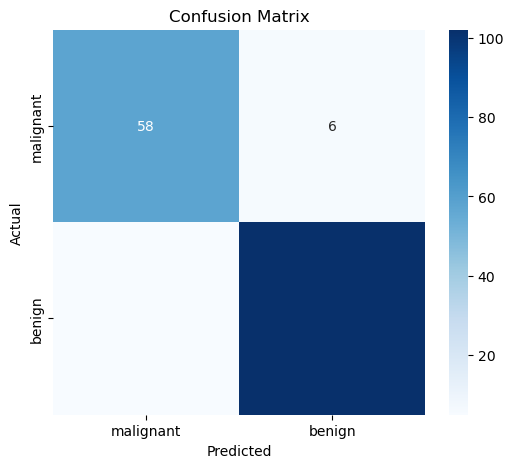

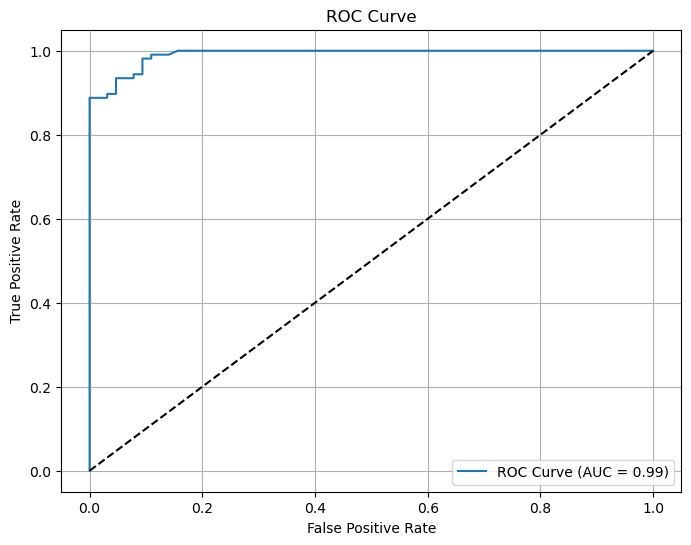

In [11]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


# Model Evaluation - Random Forest Classifier

In this section, we evaluate the performance of the **Random Forest Classifier** on a test dataset using several important classification metrics, including **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **ROC-AUC**. We also visualize the **Confusion Matrix** and the **ROC Curve**.

---

## Steps in the Script:
1. **Model Training**:
   - A `RandomForestClassifier` is trained on the training dataset (`X_train`, `y_train`).

2. **Predictions**:
   - After training, the model makes predictions on the test dataset (`X_test`).
   - We also calculate the predicted probabilities (`y_proba`) for the positive class, which will be used in the **ROC Curve** evaluation.

3. **Compute Metrics**:
   - **Accuracy**: Proportion of correct predictions over the total number of predictions.
   - **Precision**: The proportion of positive predictions that are actually correct.
   - **Recall**: The proportion of actual positives that were correctly identified by the model.
   - **F1-Score**: The harmonic mean of Precision and Recall, providing a balance between them.
   - **ROC-AUC**: Area under the Receiver Operating Characteristic curve, which evaluates the trade-off between true positive rate and false positive rate.

4. **Confusion Matrix**:
   - The confusion matrix is computed and visualized using a heatmap. It provides a detailed summary of the model’s performance, showing the number of true positives, false positives, true negatives, and false negatives.

5. **ROC Curve**:
   - The **Receiver Operating Characteristic (ROC) Curve** is plotted, which illustrates the diagnostic ability of the model as the discrimination threshold is varied. The **Area Under the Curve (AUC)** gives us a single scalar value that summarizes the overall performance of the model.

---

## Results Interpretation:
- **Accuracy**: Represents the overall correctness of the model, but it might not be sufficient for imbalanced classes.
- **Precision**: Tells us how reliable our positive predictions are.
- **Recall**: Measures how good the model is at identifying all positive instances.
- **F1-Score**: Balances Precision and Recall, especially useful when the class distribution is uneven.
- **ROC-AUC**: Higher values indicate a better model. A model with an AUC of 0.5 is no better than random guessing, while a model with an AUC of 1.0 is a perfect classifier.

---


## 5. Feature Importance Analysis

### Why Feature Importance?
Understanding which features contribute most to predictions helps in:
- Model interpretability
- Dimensionality reduction
- Feature selection

### Implementation
We will compute and visualize feature importances for the Random Forest model.



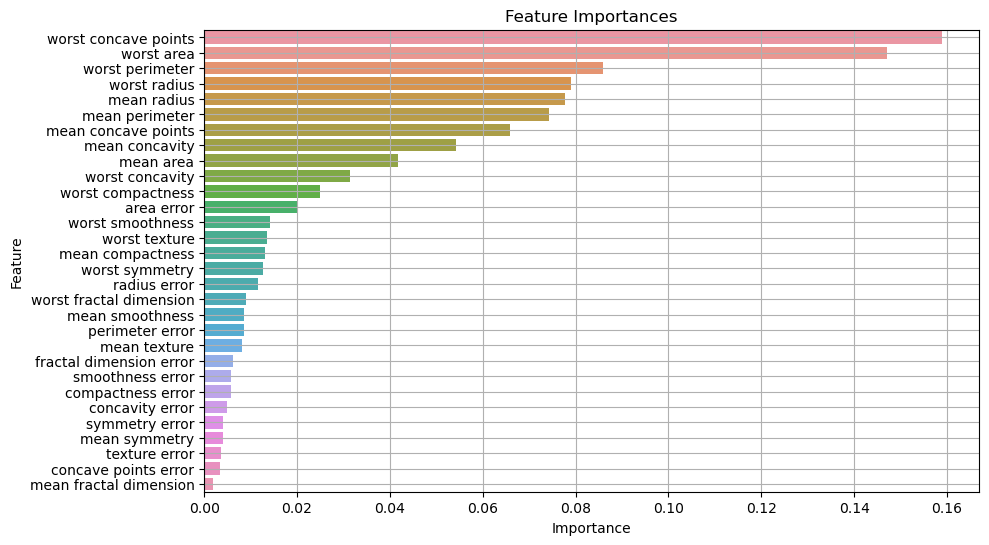

In [13]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Compute feature importances
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid()
plt.show()


# Feature Importance Analysis with Random Forest Classifier

This script demonstrates how to compute and visualize **feature importances** for a trained **Random Forest Classifier**. Feature importances provide insights into how much each feature contributes to the model's predictions.

---

## Steps in the Script:
1. **Model Training**:
   - A `RandomForestClassifier` is trained on the training dataset (`X_train`, `y_train`) using the default parameters.

2. **Compute Feature Importances**:
   - After training, the model computes the relative importance of each feature using the `feature_importances_` attribute. This attribute assigns a score to each feature based on its contribution to reducing impurity across all trees in the forest.

3. **Create a DataFrame**:
   - The feature importances are stored in a pandas DataFrame, paired with their corresponding feature names. The DataFrame is sorted in descending order of importance for easier interpretation.

4. **Visualization**:
   - A horizontal bar plot is created using **seaborn** to display the feature importances. Each bar represents a feature, and the length of the bar corresponds to the importance score.

---

## Observations:
- The x-axis of the plot represents the importance scores, and the y-axis lists the features.
- Features with higher importance scores contribute more to the model's predictions.
- Less important features might be candidates for removal in feature selection to simplify the model or improve computational efficiency.

---

## Use Case:
Feature importance analysis helps:
- Understand the inner workings of the model.
- Identify key features that drive predictions.
- Perform feature selection to optimize model performance and reduce overfitting.

This method is particularly useful in domains like finance, healthcare, and marketing, where understanding feature relevance is critical for decision-making.


## 6. Class Imbalance Handling

### Why Handle Class Imbalance?
Class imbalance can lead to biased models, as they tend to favor the majority class.

### Techniques to Handle Imbalance:
1. Oversampling the minority class (e.g., SMOTE)
2. Undersampling the majority class
3. Using class weights in the model

### Implementation
We will use SMOTE to handle class imbalance in our dataset.


In [14]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original Dataset Class Distribution: {y.value_counts()}")
print(f"Resampled Dataset Class Distribution: {pd.Series(y_resampled).value_counts()}")


Original Dataset Class Distribution: target
1    357
0    212
Name: count, dtype: int64
Resampled Dataset Class Distribution: target
0    357
1    357
Name: count, dtype: int64


# Oversampling with SMOTE

This script demonstrates the use of **SMOTE (Synthetic Minority Oversampling Technique)** to address class imbalance in the dataset. Class imbalance can negatively impact model performance by biasing predictions toward the majority class. SMOTE generates synthetic samples for the minority class to create a balanced dataset.

---

## Key Concepts:
1. **Class Imbalance**:
   - Occurs when one class has significantly more samples than the other(s).
   - Imbalanced datasets can lead to biased predictions and poor generalization, particularly for the minority class.

2. **SMOTE**:
   - SMOTE generates synthetic samples for the minority class by interpolating between existing samples.
   - It does this by selecting a sample from the minority class and one of its k-nearest neighbors, creating synthetic samples along the line connecting them.

---

## Steps in the Script:
1. **Initialize SMOTE**:
   - The `SMOTE` class from `imbalanced-learn` is used to perform oversampling. A random state is set to ensure reproducibility.

2. **Apply SMOTE**:
   - The `fit_resample` method generates a new dataset (`X_resampled`, `y_resampled`) with balanced class distributions by oversampling the minority class.

3. **Compare Class Distributions**:
   - The script compares the class distributions before and after resampling to demonstrate the effect of SMOTE.

---

## Observations:
- **Original Dataset Class Distribution**:
   - The counts of each class in the original dataset are printed to show the degree of imbalance.

- **Resampled Dataset Class Distribution**:
   - The class distributions after applying SMOTE are printed, showing that the minority class has been balanced with the majority class.

---

## Use Case:
- SMOTE is widely used in classification problems where the dataset suffers from class imbalance, such as fraud detection, medical diagnosis, and churn prediction.
- By balancing the dataset, SMOTE ensures that the model has enough samples to learn patterns for all classes, improving its ability to generalize to unseen data.

---


## 7. Threshold Analysis

### What is Threshold Analysis?
Threshold analysis involves adjusting the decision threshold of a classifier to balance precision and recall.

### Implementation
We will adjust the threshold and visualize its effect on precision, recall, and F1-score.


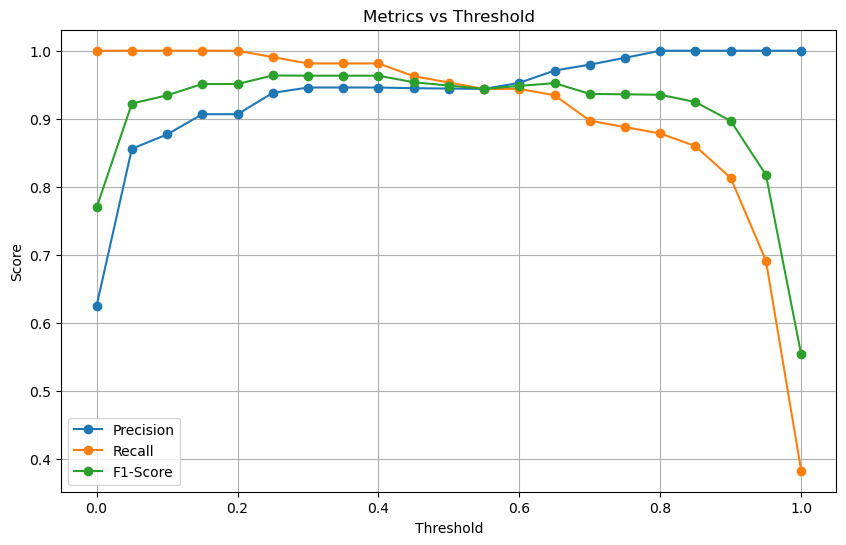

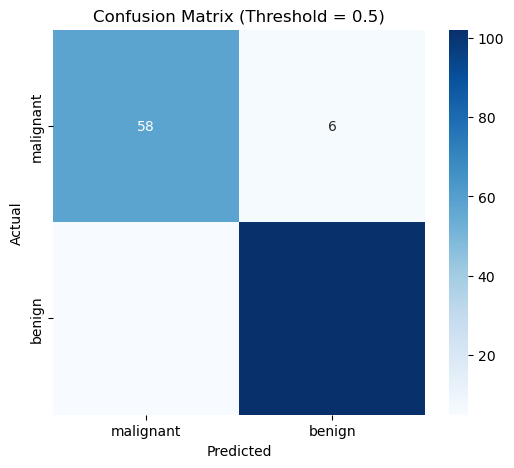

In [17]:
# Threshold analysis 
thresholds = np.arange(0.0, 1.05, 0.05)  # Generate thresholds from 0.0 to 1.0 with a step of 0.05
precision_scores = []
recall_scores = []
f1_scores = []

# Compute metrics for each threshold
for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Plot metrics vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label="Precision", marker='o')
plt.plot(thresholds, recall_scores, label="Recall", marker='o')
plt.plot(thresholds, f1_scores, label="F1-Score", marker='o')
plt.title("Metrics vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# Optional: Display confusion matrix for a specific threshold
selected_threshold = 0.5  # Change this value to analyze a different threshold
y_pred_selected = (y_proba >= selected_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_selected)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title(f"Confusion Matrix (Threshold = {selected_threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Threshold Analysis for Classification Metrics

This script performs a **Threshold Analysis** to evaluate how varying the decision threshold affects the performance metrics of a binary classification model. It provides insights into the trade-offs between **Precision**, **Recall**, and **F1-Score** at different thresholds and allows for a customized analysis using a specific threshold.

---

## Key Concepts:
1. **Threshold in Classification**:
   - The decision threshold determines the probability above which a sample is classified as the positive class.
   - Adjusting the threshold impacts the balance between Precision and Recall.

2. **Precision, Recall, and F1-Score**:
   - **Precision**: The proportion of predicted positives that are true positives.
   - **Recall**: The proportion of actual positives that are correctly identified.
   - **F1-Score**: The harmonic mean of Precision and Recall, balancing the trade-off between them.

---

## Steps in the Script:
1. **Generate Thresholds**:
   - Thresholds are generated from 0.0 to 1.0 in increments of 0.05.

2. **Compute Metrics**:
   - For each threshold:
     - Predictions are made by comparing probabilities (`y_proba`) to the threshold.
     - Precision, Recall, and F1-Score are computed using the predicted labels.

3. **Plot Metrics vs Threshold**:
   - The metrics are plotted against the thresholds to visualize their behavior.
   - The plot highlights how Precision, Recall, and F1-Score change with varying thresholds.

4. **Analyze a Specific Threshold**:
   - A confusion matrix is displayed for a user-selected threshold (default: 0.5), allowing detailed analysis of model performance.

---

## Observations:
- **Metrics vs Threshold**:
  - **Precision** increases as the threshold becomes more stringent, focusing on fewer but more confident positive predictions.
  - **Recall** decreases as the threshold increases, as fewer positives are identified.
  - The **F1-Score** balances the two, peaking at an optimal threshold.

- **Confusion Matrix**:
  - For a selected threshold, the confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
  - It helps analyze how changes in the threshold affect classification performance.

---

## Use Case:
- Threshold analysis is crucial in scenarios where Precision or Recall is more critical, such as:
  - **High Precision**: Fraud detection, where false positives must be minimized.
  - **High Recall**: Medical diagnosis, where false negatives could be life-threatening.

---



## 8. Hyperparameter Tuning

### Why Tune Hyperparameters?
Hyperparameter tuning helps optimize the model's performance by finding the best combination of parameters. Different combinations can significantly impact the model's accuracy, generalization, and robustness.

### Implementation
We will evaluate the performance of a Random Forest model across a range of hyperparameters, specifically:
- Number of estimators (`n_estimators`)
- Maximum depth of trees (`max_depth`)

The results will be visualized, and the best combination of hyperparameters will be identified based on the testing accuracy.


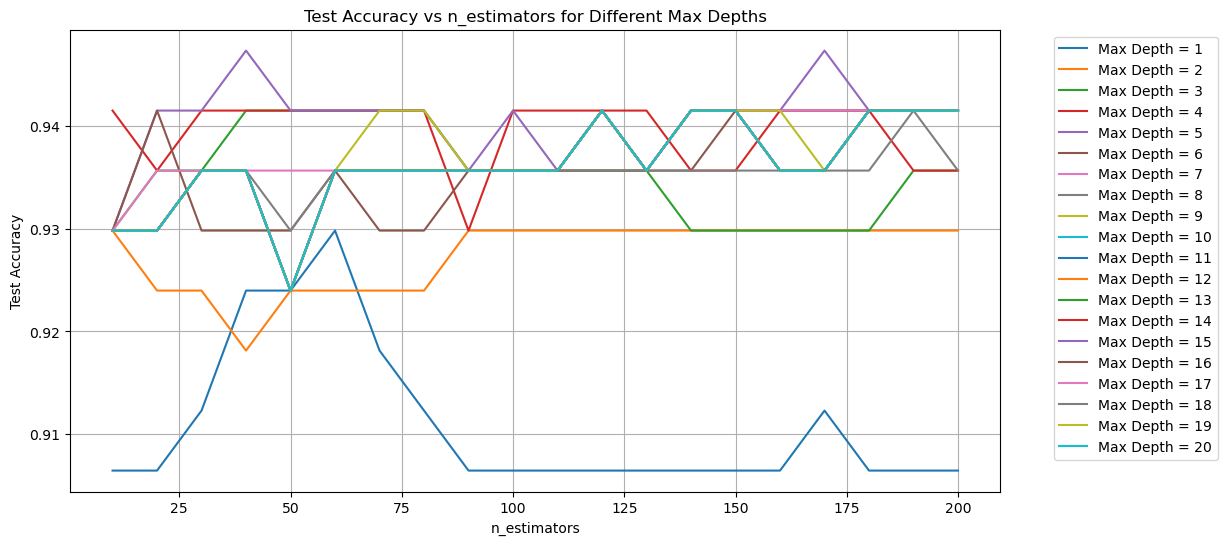

Best Hyperparameters:
n_estimators: 40.0
max_depth: 5.0
Test Accuracy: 0.95
ROC-AUC: 0.99


In [19]:
# Define hyperparameter ranges
n_estimators_range = range(10, 201, 10)  # Number of trees
max_depth_range = range(1, 21)  # Maximum depth of trees

# Initialize list to store results
results = []

# Evaluate the model for each combination of hyperparameters
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        results.append((n_estimators, max_depth, train_accuracy, test_accuracy, roc_auc))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["n_estimators", "max_depth", "Train Accuracy", "Test Accuracy", "ROC-AUC"])

# Visualize Test Accuracy vs n_estimators for each max_depth
plt.figure(figsize=(12, 6))
for max_depth in max_depth_range:
    subset = results_df[results_df['max_depth'] == max_depth]
    plt.plot(subset['n_estimators'], subset['Test Accuracy'], label=f"Max Depth = {max_depth}")

plt.title("Test Accuracy vs n_estimators for Different Max Depths")
plt.xlabel("n_estimators")
plt.ylabel("Test Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Identify the best hyperparameters
best_params = results_df.loc[results_df['Test Accuracy'].idxmax()]
print("Best Hyperparameters:")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"max_depth: {best_params['max_depth']}")
print(f"Test Accuracy: {best_params['Test Accuracy']:.2f}")
print(f"ROC-AUC: {best_params['ROC-AUC']:.2f}")


# Hyperparameter Tuning for Random Forest Classifier

This script demonstrates how to evaluate and visualize the impact of different hyperparameter combinations on the performance of a **Random Forest Classifier**. Hyperparameter tuning is essential for optimizing model performance.

---

## Key Concepts:
1. **Hyperparameters**:
   - **`n_estimators`**: The number of trees in the Random Forest. Increasing this value often improves accuracy but increases computation time.
   - **`max_depth`**: The maximum depth of each tree. Controlling this parameter helps prevent overfitting.

2. **Evaluation Metrics**:
   - **Train Accuracy**: Accuracy of the model on the training dataset.
   - **Test Accuracy**: Accuracy of the model on the testing dataset.
   - **ROC-AUC**: Area under the Receiver Operating Characteristic curve, indicating the model's ability to distinguish between classes.

---

## Steps in the Script:
1. **Define Hyperparameter Ranges**:
   - A range of values for `n_estimators` (10 to 200 in steps of 10) and `max_depth` (1 to 20) is specified for grid search.

2. **Model Evaluation**:
   - For each combination of `n_estimators` and `max_depth`:
     - A Random Forest Classifier is trained and tested.
     - Train accuracy, test accuracy, and ROC-AUC scores are calculated.
   - Results are stored in a list.

3. **Convert Results to DataFrame**:
   - The results are converted into a pandas DataFrame for easy analysis and visualization.

4. **Visualization**:
   - A line plot shows how **Test Accuracy** changes with `n_estimators` for different values of `max_depth`.

5. **Identify Best Hyperparameters**:
   - The combination of `n_estimators` and `max_depth` that gives the highest test accuracy is identified and printed.

---

## Observations:
- **Test Accuracy vs `n_estimators`**:
  - The plot shows how test accuracy improves with the number of trees (`n_estimators`) for each `max_depth`. This helps understand the impact of model complexity.

- **Best Hyperparameters**:
  - The script identifies the hyperparameter combination that maximizes test accuracy and reports the corresponding metrics.

---

## Use Case:
Hyperparameter tuning is a critical step in building a robust Random Forest model. By systematically evaluating different combinations of parameters, we can:
- Avoid overfitting or underfitting.
- Improve model generalization to unseen data.
- Optimize computation time by choosing efficient parameter values.

---

